## Importing related library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard # type: ignore
from keras import regularizers

LABELS = ["Normal", "Fraud"]

In [2]:
dataset = pd.read_csv("./Dataset/creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
features = dataset.iloc[:,]
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(dataset.shape)

(284807, 31)


## To check whether any value of cell is empty or not

In [5]:
dataset.isnull().values.any()

False

C:\Users\Vikas\AppData\Local\Temp\ipykernel_18548\2080967165.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes_count = pd.value_counts(dataset['Class'],sort = True).sort_index()


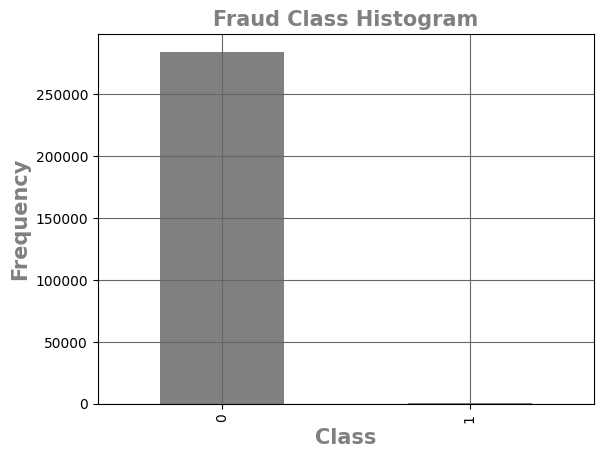

In [6]:
classes_count = pd.value_counts(dataset['Class'],sort = True).sort_index()
classes_count.plot(kind='bar', color = "Gray")
plt.title('Fraud Class Histogram', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Class', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Frequency', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.show()

In [7]:
# from imblearn.over_sampling import SMOTE as sm
# x_sampled , y_sampled = sm().fit_resample(dataset)
# from collections import Counter ## separate collection for 0 and 1 
# print(sorted(Counter(y_sampled).items()))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataset['normalize_amount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
# dataset['normalize_time'] = scaler.fit_transform(dataset['Time'].values.reshape(-1,1))


In [9]:
dataset = dataset.drop(['Time'], axis = 1)
dataset = dataset.drop(['Amount'], axis = 1)

In [10]:
features = dataset.iloc[:, dataset.columns != 'Class']
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalize_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
label = dataset.iloc[:, dataset.columns == 'Class']
label.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter


sm = SMOTE(random_state=42)
x_Sampled, y_Sampled = sm.fit_resample(features, label.values.ravel())

# Print the new class distribution
print(sorted(Counter(y_Sampled).items()))


[(0, 284315), (1, 284315)]


In [13]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalize_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [14]:
X_feature, X_target, y_feature, y_target = train_test_split(x_Sampled,y_Sampled, test_size = 0.2 , random_state = 42)




In [15]:
X_feature = X_feature.values
X_target = X_target.values

In [16]:
X_feature.shape

(454904, 29)

In [17]:
X_target.shape

(113726, 29)

In [18]:
# dataset.head()

In [19]:
input_dim = X_feature.shape[1]
input_dim

29

In [20]:
encoding_dim = 14

In [21]:
hidden_dim = int(encoding_dim / 2)
hidden_dim

7

In [22]:
learning_rate = 1e-5

In [23]:
input_layer = Input(shape= (input_dim,))

encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation="relu")(decoder)

autoencoder = Model(inputs = input_layer, outputs = decoder)

In [24]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │           232 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813 (3.18 KB)

 Trainable params: 813 (3.18 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:

# Compile the Autoencoder
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='autoencoder.keras',  # Changed to .keras
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='.logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_feature, X_feature,  # Autoencoders use input as target
                          epochs=100,
                          batch_size=30,
                          shuffle=True,
                          validation_data=(X_target, X_target),  # Using X_target for validation
                          verbose=1,
                          callbacks=[checkpointer, tensorboard])

best_model = load_model('autoencoder.keras')  # Also changed to .keras

Epoch 1/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.4505 - loss: 12.3145 - val_accuracy: 0.6512 - val_loss: 11.9479
Epoch 2/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.6624 - loss: 11.8129 - val_accuracy: 0.7063 - val_loss: 11.9130
Epoch 3/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7185 - loss: 11.8158 - val_accuracy: 0.7283 - val_loss: 11.8725
Epoch 4/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7282 - loss: 11.8082 - val_accuracy: 0.7392 - val_loss: 11.8619
Epoch 5/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7390 - loss: 11.7344 - val_accuracy: 0.7031 - val_loss: 11.8807
Epoch 6/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7403 - loss: 11.7250 - val_accuracy: 0.7463 - val_loss: 11.8486
Epoch 7/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7442 - loss: 11.7730 - val_accuracy: 0.7477 - val_loss: 11.8471
Epoch 8/100
15164/15164 ━━━━━━━━━━━━━━━━━━━━ 29s

In [28]:
predictions = autoencoder.predict(X_target)
predictions.shape

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


(113726, 29)

In [30]:
mean_squared_error = np.mean(np.power(X_target - predictions, 2), axis =1)
# mean_squared_error
error_df = pd.DataFrame({'error':mean_squared_error, 'true_class':y_target})

In [31]:
error_df.describe()

,error,true_class
count,113726.000000,113726.000000
mean,11.813380,0.500994
std,25.342400,0.500001
min,0.076927,0.000000
25%,0.392797,0.000000
50%,0.898111,1.000000
75%,8.179313,1.000000
max,386.684745,1.000000


In [32]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

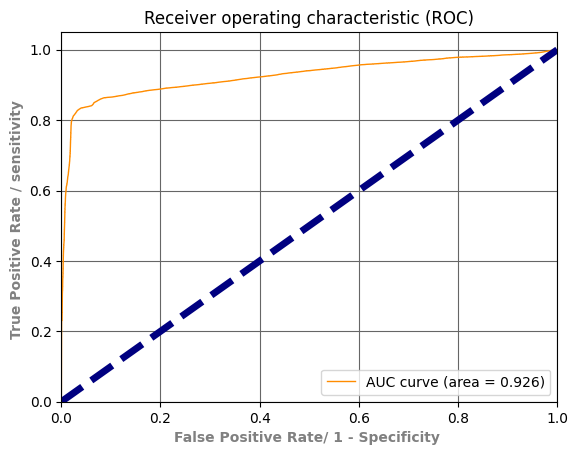

In [33]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.true_class, error_df.error)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.figure()
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=1, label='AUC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate/ 1 - Specificity ',  fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('True Positive Rate / sensitivity ' ,  fontweight='bold', fontsize = '10', color = "gray")
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.show()
# fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.error)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([-0.001, 1])
# plt.ylim([0, 1.001])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show();

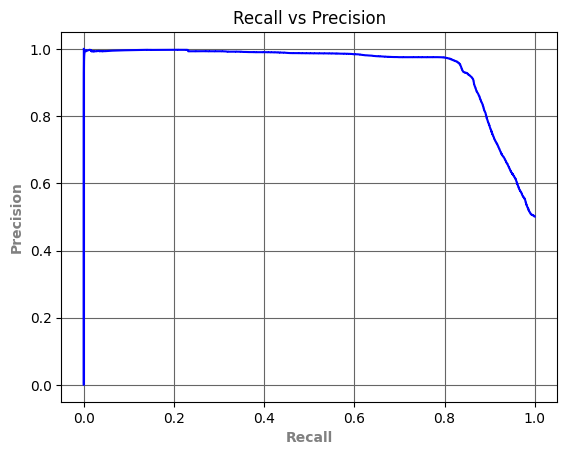

In [34]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall',fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('Precision',fontweight='bold', fontsize = '10', color = "gray")
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.show()

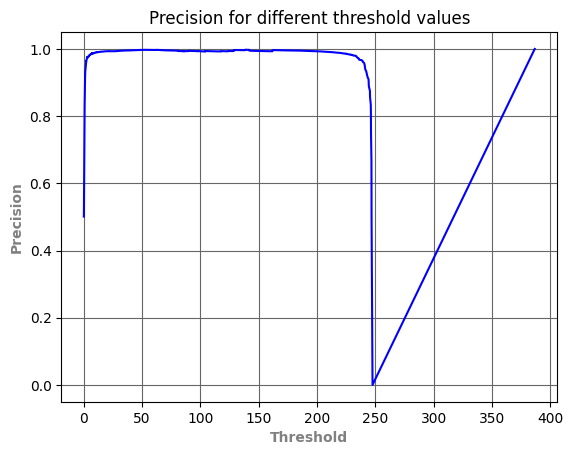

In [35]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold', fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('Precision',fontweight='bold', fontsize = '10', color = "gray" )
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.show()

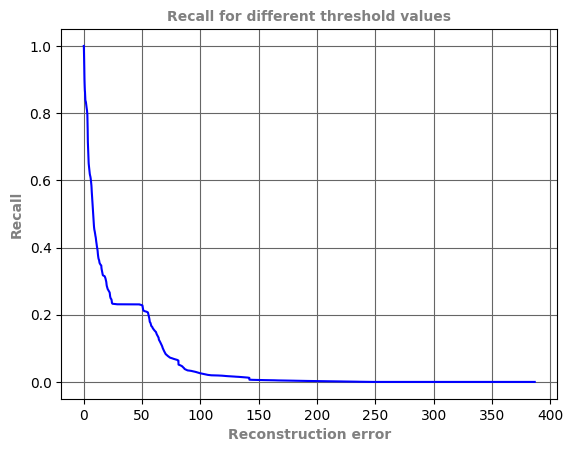

In [36]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values', fontweight='bold', fontsize = '10', color = "gray")
plt.xlabel('Reconstruction error', fontweight='bold', fontsize = '10', color = "gray")
plt.ylabel('Recall', fontweight='bold', fontsize = '10', color = "gray")
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.show()

In [52]:
y_pred = [1 if e > 0.5 else 0 for e in error_df.error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[33374, 23376],
       [ 4300, 52676]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71     56750
           1       0.69      0.92      0.79     56976

    accuracy                           0.76    113726
   macro avg       0.79      0.76      0.75    113726
weighted avg       0.79      0.76      0.75    113726



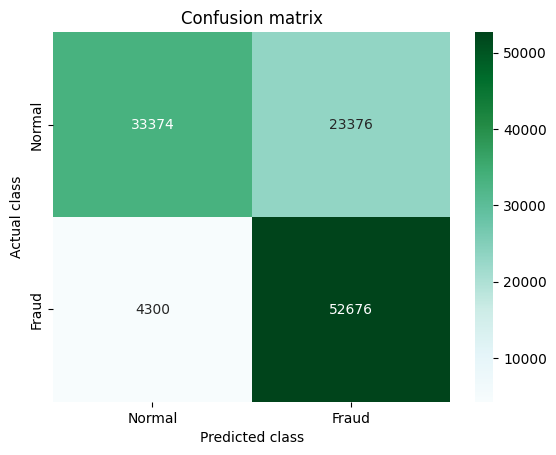

In [54]:
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap=plt.cm.BuGn);
plt.title("Confusion matrix")
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()